# 6.3 Geographic Visualization¶

### This script contains the following:
####  Import data and libraries
####  Data wrangling
#### Plotting a choropleth

###  Import data and libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [108]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [109]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Advanced analytics $ Dashboard Desigh\Exercise 6.3/United states.json'

In [110]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Advanced analytics $ Dashboard Desigh\Exercise 6.3/United states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [111]:
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Advanced analytics $ Dashboard Desigh\Online Shopping Analysis\Data'

In [112]:
# Import data

df = pd.read_excel(os.path.join(path, 'Prepared Data', 'Cleaned_Data.xlsx'))

In [113]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_ID,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,TAX,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10


In [114]:
df.shape

(52924, 20)

### Data wrangling

In [115]:
# In Location column Replacing Chicago as illinois,
df['Location'].replace({'Chicago': 'Illinois'}, inplace = True)

In [116]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_ID,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,TAX,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Illinois,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
1,17850.0,M,Illinois,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
2,17850.0,M,Illinois,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
3,17850.0,M,Illinois,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
4,17850.0,M,Illinois,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10


In [117]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_ID', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'TAX', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  float64       
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  int64         
 4   Transaction_ID       52924 non-null  float64       
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Product_ID           52924 non-null  object        
 7   Product_Description  52924 non-null  object        
 8   Product_Category     52924 non-null  object        
 9   Quantity             52924 non-null  int64         
 10  Avg_Price            52924 non-null  float64       
 11  Delivery_Charges     52924 non-null  float64       
 12  Coupon_Status        52924 non-null  object        
 13  TAX                  52924 non-

In [119]:
df.dtypes

CustomerID                    float64
Gender                         object
Location                       object
Tenure_Months                   int64
Transaction_ID                float64
Transaction_Date       datetime64[ns]
Product_ID                     object
Product_Description            object
Product_Category               object
Quantity                        int64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
TAX                           float64
Date                   datetime64[ns]
Offline_Spend                   int64
Online_Spend                  float64
Month                           int64
Coupon_Code                    object
Discount_pct                    int64
dtype: object

#### Checking for extreme values

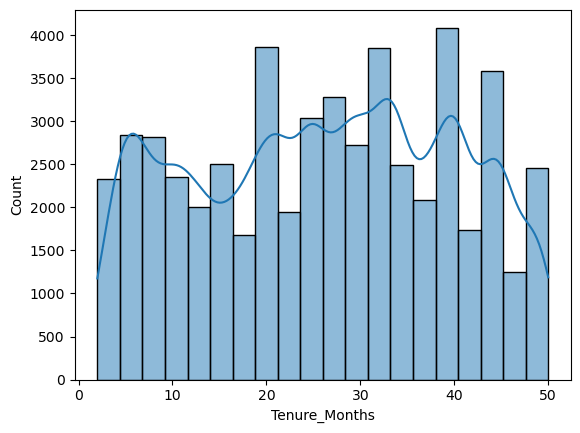

In [120]:
#Created a histogram for extreme values for Tenure_Months 
hist_count = sns.histplot(df['Tenure_Months'], bins = 20, kde = True)

- We don't see extreme values in Tenure_Months. So we will keep all the data points for the analysis

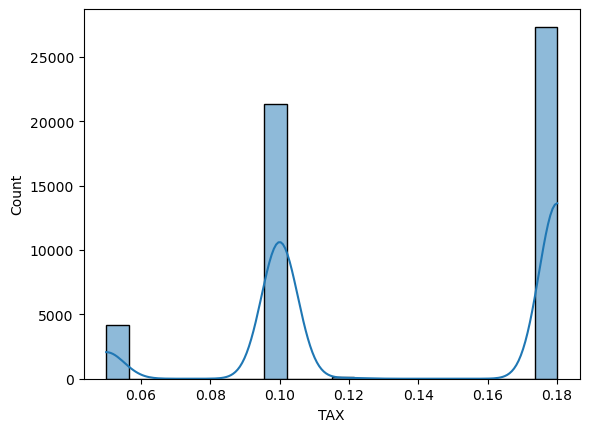

In [121]:
#Created a histogram for extreme values for TAX
hist_count = sns.histplot(df['TAX'], bins = 20, kde = True)

- Tax rate might be higher or lower based on state laws. So we keep all data for the analysis

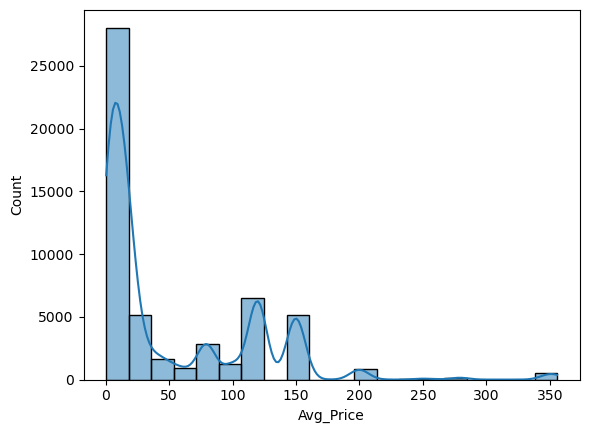

In [122]:
#Created a histogram for extreme values for Avg_Price
hist_count = sns.histplot(df['Avg_Price'], bins = 20, kde = True)

- There are more products with average price less than 25. But we don't want to remove the outliers as some products might be of higher price in general

### Plotting Choropleth

In [123]:
# Create a data frame with just the Location  and the values for Avg_Price
Avg_Price = df[['Location','Avg_Price']]
Avg_Price.head()

,Location,Avg_Price
0,Illinois,153.71
1,Illinois,153.71
2,Illinois,122.77
3,Illinois,81.50
4,Illinois,153.71


In [124]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = Avg_Price,
    columns = ['Location', 'Avg_Price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average price of the product").add_to(map)
folium.LayerControl().add_to(map)

map

In [125]:
# Save the map as an HTML file
map.save('Avg_price_map.html')

In [126]:
# Create a data frame with just the Location  and the values for Tenure_Months
Tenure_Months= df[['Location','Tenure_Months']]
Tenure_Months.head()

,Location,Tenure_Months
0,Illinois,12
1,Illinois,12
2,Illinois,12
3,Illinois,12
4,Illinois,12


In [127]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = Tenure_Months,
    columns = ['Location', 'Tenure_Months'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Tenure_Months").add_to(map)
folium.LayerControl().add_to(map)

map

In [128]:
# Save the map as an HTML file
map.save('Tenure_Months_map.html')

In [129]:
# Create a data frame with just the Location  and the values for Quantity
Quantity= df[['Location','Quantity']]
Quantity.head()

,Location,Quantity
0,Illinois,1
1,Illinois,1
2,Illinois,2
3,Illinois,1
4,Illinois,1


In [130]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = Quantity,
    columns = ['Location', 'Quantity'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Quantity Sold").add_to(map)
folium.LayerControl().add_to(map)

map

In [131]:
# Save the map as an HTML file
map.save('Quantity Sold_map.html')

In [132]:
# Create a data frame with just the Location  and the values for Delivery_Charges
Delivery_Charges= df[['Location','Delivery_Charges']]
Delivery_Charges.head()

,Location,Delivery_Charges
0,Illinois,6.5
1,Illinois,6.5
2,Illinois,6.5
3,Illinois,6.5
4,Illinois,6.5


In [133]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = Delivery_Charges,
    columns = ['Location', 'Delivery_Charges'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Delivery_Charge").add_to(map)
folium.LayerControl().add_to(map)

map

In [134]:
# Save the map as an HTML file
map.save('Delivery_Charge_map.html')

In [135]:
# Create a data frame with just the Location  and the values for Discount_pct
Discount_pct= df[['Location','Discount_pct']]
Discount_pct.head()

,Location,Discount_pct
0,Illinois,10
1,Illinois,10
2,Illinois,10
3,Illinois,10
4,Illinois,10


In [136]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = Discount_pct,
    columns = ['Location', 'Discount_pct'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Discount Percent").add_to(map)
folium.LayerControl().add_to(map)

map

In [137]:
# Save the map as an HTML file
map.save('Discount_pct_map.html')

In [138]:
# Create a data frame with just the Location  and the values for Online_Spend
Online_Spend= df[['Location','Online_Spend']]
Online_Spend.head()

,Location,Online_Spend
0,Illinois,2424.5
1,Illinois,2424.5
2,Illinois,2424.5
3,Illinois,2424.5
4,Illinois,2424.5


In [139]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = Online_Spend,
    columns = ['Location', 'Online_Spend'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Online Spend").add_to(map)
folium.LayerControl().add_to(map)

map

In [140]:
# Save the map as an HTML file
map.save('Online Spend_map.html')

### Discussion

- From above map we find out that customers from California and Illinois spend more on online shopping.This answers our research question of which state spend more on online shopping.  

- Analyzing other maps, New York is probably most important market than other states. New York has customers with longer tenure and higher  average price of product. The delivery charges and discount percentages are also higher in New York. 

- But relatively online spend in New York is less than other states indicating that there is more opportunity of better marketing in New York